In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import FinanceDataReader as fdr

# 0. Data import for target and features
- European carbon credit price(EUA future price from ICE) 
- Currency, indexes for relevant stock markets, commodities etc.
- 2015.1 ~ now : From the ex-ante of Paris Agreement
- Data downloaded by FinanceDataReader

In [105]:
# import

In [29]:
# currency
euro = fdr.DataReader('EUR/USD', '2015', '2022')
bcoin = fdr.DataReader('BTC/USD', '2015', '2022')

# european stock price index
euro_stox = fdr.DataReader('STOXX50', '2015','2022')
german = fdr.DataReader('DE30', '2015', '2022')
uk = fdr.DataReader('UK100', '2015','2022')
french = fdr.DataReader('FCHI', '2015','2022')

# relevant stock market
chino = fdr.DataReader('SSEC', '2015', '2022')
india = fdr.DataReader('NSEI', '2015', '2022')
brasil = fdr.DataReader('BVSP', '2015','2022')
corea = fdr.DataReader('KS11', '2015', '2022')
states = fdr.DataReader('DJI', '2015','2022')

# commodities
copper = fdr.DataReader('HG', '2015','2022')
lumber = fdr.DataReader('LBc1', '2015', '2022')
cattle = fdr.DataReader('Lcc1', '2015', '2022')
corn = fdr.DataReader('ZC', '2015','2022')
wheat = fdr.DataReader('ZW', '2015','2022')

# energy
crude = fdr.DataReader('WTI/USD', '2015','2022')
n_gas = fdr.DataReader('NG', '2015', '2022')

# the target
carbon = fdr.DataReader('CFI2Z1', '2015', '2022')

In [107]:
# cleaning

In [30]:
features = [euro, bcoin, euro_stox, german, uk, french, chino, india,\
           brasil, corea, states, copper, lumber, cattle, corn, wheat,\
           crude, n_gas, carbon]
ftrs = ['euro', 'bcoin', 'euro_stox', 'german', 'uk', 'french', 'chino',\
        'india', 'brasil', 'corea', 'states', 'copper', 'lumber',\
        'cattle', 'corn', 'wheat', 'crude', 'n_gas', 'carbon']

In [109]:
features_sc = [euro, bcoin, euro_stox, german, uk, french, chino, india,\
           brasil, corea, states, copper, lumber, cattle, corn, wheat,\
           crude, n_gas]
ftrs_sc = ['euro', 'bcoin', 'euro_stox', 'german', 'uk', 'french', 'chino',\
        'india', 'brasil', 'corea', 'states', 'copper', 'lumber',\
        'cattle', 'corn', 'wheat', 'crude', 'n_gas']

In [31]:
for i, j in enumerate(features):
    print(ftrs[i])
    print(j.shape)

euro
(1827, 5)
bcoin
(2558, 6)
euro_stox
(1792, 6)
german
(1770, 6)
uk
(1771, 6)
french
(1793, 6)
chino
(1705, 6)
india
(1734, 6)
brasil
(1729, 6)
corea
(1723, 6)
states
(1763, 6)
copper
(1685, 6)
lumber
(1750, 6)
cattle
(1757, 6)
corn
(1763, 6)
wheat
(1721, 6)
crude
(2012, 5)
n_gas
(1758, 6)
carbon
(1717, 6)


In [85]:
euro['Volume']=0
crude['Volume']=0

In [48]:
price = pd.DataFrame()
for i,j in enumerate(features):
    price[ftrs[i]]=j['Close']  
price = price.fillna(method='pad').iloc[2:]

In [88]:
volume = pd.DataFrame()
for i,j in enumerate(features):
    volume[ftrs[i]]=j['Volume']  
volume = volume.fillna(method='pad').iloc[2:]

In [94]:
print(price.shape, volume.shape)

(1825, 19) (1825, 19)


In [95]:
volume.columns

Index(['euro', 'bcoin', 'euro_stox', 'german', 'uk', 'french', 'chino',
       'india', 'brasil', 'corea', 'states', 'copper', 'lumber', 'cattle',
       'corn', 'wheat', 'crude', 'n_gas', 'carbon'],
      dtype='object')

In [99]:
volume.columns=['v_euro', 'v_bcoin', 'v_euro_stox', 'v_german', 'v_uk', 'v_french', 'v_chino',
       'v_india', 'v_brasil', 'v_corea', 'v_states', 'v_copper', 'v_lumber', 'v_cattle',
       'v_v_corn', 'v_wheat', 'v_crude', 'v_n_gas', 'v_carbon']

In [131]:
v = ['v_euro', 'v_bcoin', 'v_euro_stox', 'v_german', 'v_uk', 'v_french', 'v_chino',
       'v_india', 'v_brasil', 'v_corea', 'v_states', 'v_copper', 'v_lumber', 'v_cattle',
       'v_v_corn', 'v_wheat', 'v_crude', 'v_n_gas', 'v_carbon']

In [100]:
volume

,v_euro,v_bcoin,v_euro_stox,v_german,v_uk,v_french,v_chino,v_india,v_brasil,v_corea,v_states,v_copper,v_lumber,v_cattle,v_v_corn,v_wheat,v_crude,v_n_gas,v_carbon
Date,,,,,,,,,,,,,,,,,,,
2015-01-05,0,54990.0,77460000.0,105540000.0,750520000.0,137890000.0,5.314000e+10,118160000.0,3870000.0,313440000.0,116160000.0,330.0,190.0,16540.0,140390.0,45080.0,0.0,141780.0,90.0
2015-01-06,0,21940.0,67020000.0,96810000.0,793260000.0,130810000.0,5.017000e+10,172800000.0,4560000.0,303690000.0,101870000.0,310.0,200.0,31200.0,138310.0,52460.0,0.0,111340.0,590.0
2015-01-07,0,30670.0,67360000.0,82470000.0,709500000.0,121320000.0,3.919000e+10,164080000.0,4410000.0,280510000.0,91030000.0,460.0,80.0,24730.0,131690.0,46080.0,0.0,134830.0,460.0
2015-01-08,0,20180.0,76460000.0,114830000.0,910040000.0,154420000.0,3.711000e+10,143800000.0,3620000.0,262210000.0,114890000.0,240.0,40.0,38360.0,118970.0,49560.0,0.0,147800.0,1000.0
2015-01-09,0,20930.0,123510000.0,107470000.0,761330000.0,139010000.0,4.102000e+10,152610000.0,3000000.0,308780000.0,93390000.0,300.0,30.0,28820.0,154550.0,54780.0,0.0,107330.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0,43900.0,13900000.0,28900000.0,126010000.0,34920000.0,3.292000e+10,144780000.0,7590000.0,475360000.0,241550000.0,420.0,160.0,770.0,123210.0,36620.0,0.0,38910.0,3630.0
2021-12-28,0,74390.0,16910000.0,34020000.0,126010000.0,36150000.0,3.162000e+10,176030000.0,7510000.0,607050000.0,231820000.0,540.0,170.0,610.0,134210.0,36620.0,0.0,35640.0,4610.0
2021-12-29,0,63920.0,16660000.0,34970000.0,445970000.0,37480000.0,3.051000e+10,161680000.0,6590000.0,545830000.0,206450000.0,330.0,190.0,670.0,117570.0,36620.0,0.0,4820.0,10440.0


In [103]:
df = pd.merge(price, volume, left_index= True, right_index =True)

In [104]:
df

,euro,bcoin,euro_stox,german,uk,french,chino,india,brasil,corea,...,v_corea,v_states,v_copper,v_lumber,v_cattle,v_v_corn,v_wheat,v_crude,v_n_gas,v_carbon
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.1934,274.8,3023.14,9473.16,6417.16,4111.36,3350.52,8378.40,47517.0,1915.75,...,313440000.0,116160000.0,330.0,190.0,16540.0,140390.0,45080.0,0.0,141780.0,90.0
2015-01-06,1.1889,282.3,3007.91,9469.66,6366.51,4083.50,3351.45,8127.35,48001.0,1882.45,...,303690000.0,101870000.0,310.0,200.0,31200.0,138310.0,52460.0,0.0,111340.0,590.0
2015-01-07,1.1839,291.3,3026.79,9518.18,6419.83,4112.73,3373.95,8102.10,49463.0,1883.83,...,280510000.0,91030000.0,460.0,80.0,24730.0,131690.0,46080.0,0.0,134830.0,460.0
2015-01-08,1.1793,282.7,3135.08,9837.61,6569.96,4260.19,3293.46,8234.60,49943.0,1904.65,...,262210000.0,114890000.0,240.0,40.0,38360.0,118970.0,49560.0,0.0,147800.0,1000.0
2015-01-09,1.1841,288.0,3042.90,9648.50,6501.14,4179.07,3285.41,8284.50,48840.0,1924.70,...,308780000.0,93390000.0,300.0,30.0,28820.0,154550.0,54780.0,0.0,107330.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.1325,50678.2,4287.98,15835.25,7372.10,7140.39,3615.97,17086.25,105554.0,2999.55,...,475360000.0,241550000.0,420.0,160.0,770.0,123210.0,36620.0,0.0,38910.0,3630.0
2021-12-28,1.1309,47545.2,4311.93,15963.70,7372.10,7181.11,3630.11,17233.25,104864.0,3020.24,...,607050000.0,231820000.0,540.0,170.0,610.0,134210.0,36620.0,0.0,35640.0,4610.0
2021-12-29,1.1348,46461.7,4284.83,15852.25,7420.69,7161.52,3597.00,17213.60,104107.0,2993.29,...,545830000.0,206450000.0,330.0,190.0,670.0,117570.0,36620.0,0.0,4820.0,10440.0


# 1. Exploratory Data Analysis(EDA)
- visualization
- check correlation 

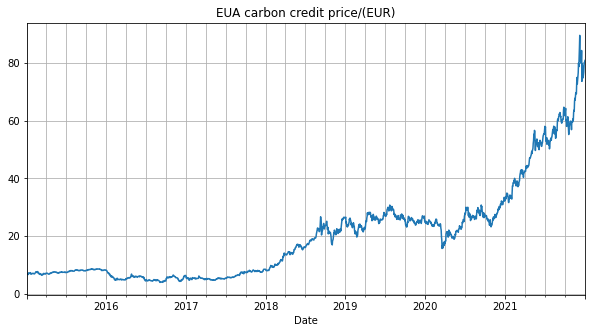

In [129]:
# price : target
plt.figure(figsize=(10,5))
df['carbon'].plot()
plt.title('EUA carbon credit price/(EUR)')
plt.grid(which='both')
plt.show()


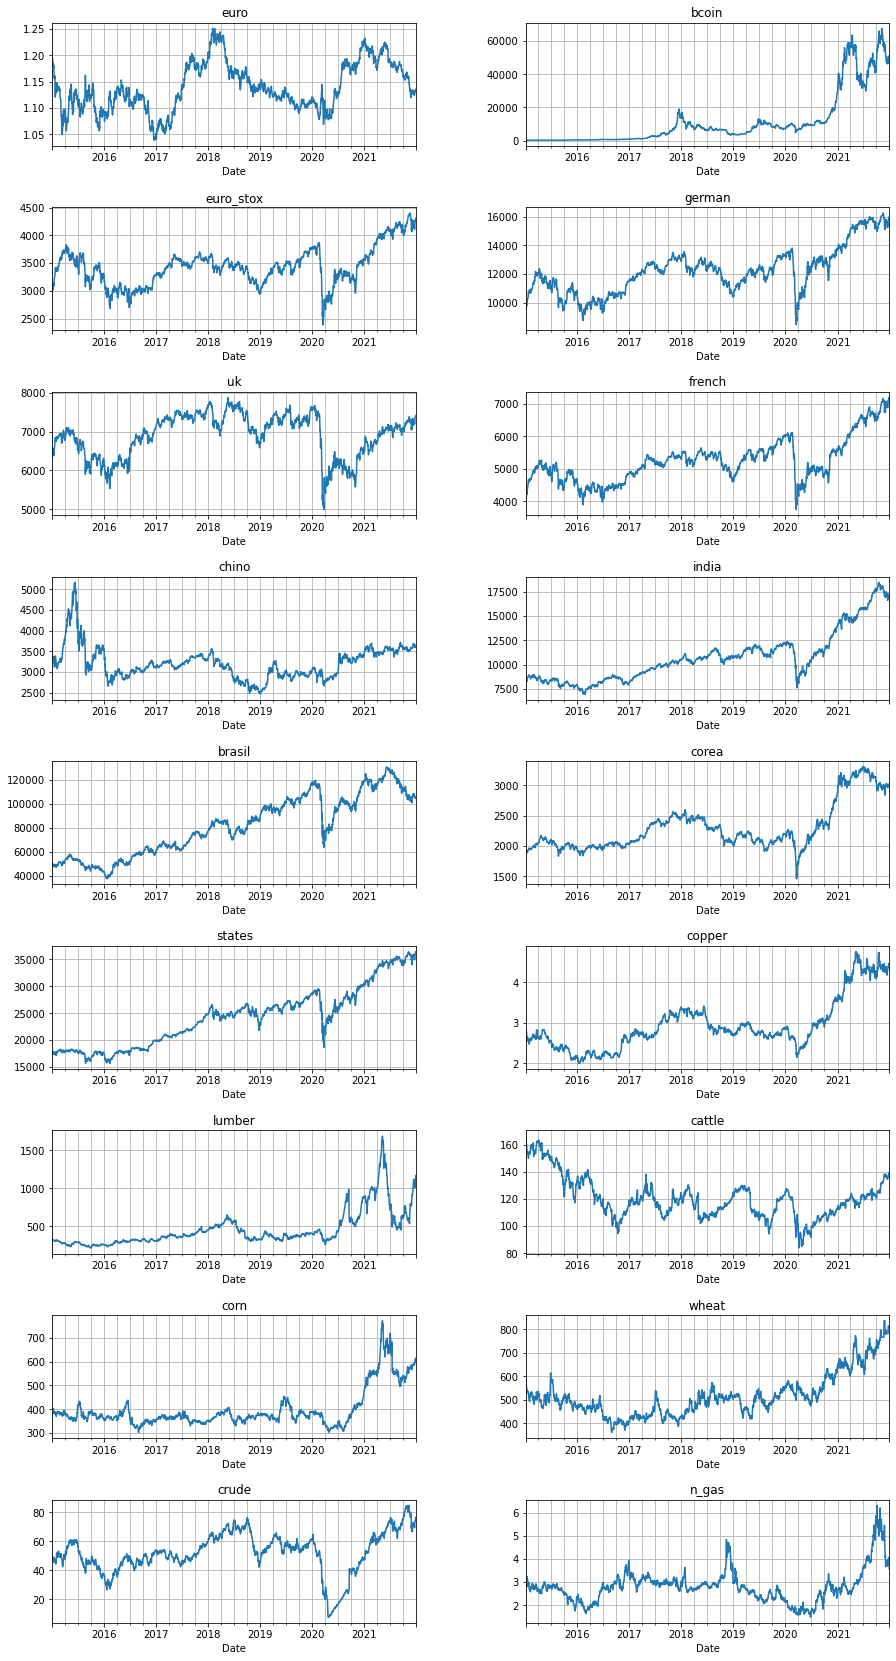

In [142]:
# price : features
plt.figure(figsize =(15, 60))

for i, feature in enumerate(features_sc):
    plt.subplot(18, 2, i+1)
    df[ftrs_sc[i]].plot()
    plt.title(ftrs_sc[i])
    plt.grid(which='both')
    
plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()

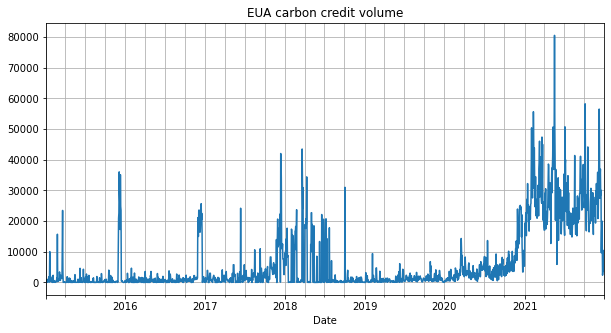

In [130]:
# volume: target
plt.figure(figsize=(10,5))
df['v_carbon'].plot()
plt.title('EUA carbon credit volume')
plt.grid(which='both')
plt.show()

In [133]:
v_mod = [
 'v_bcoin',
 'v_euro_stox',
 'v_german',
 'v_uk',
 'v_french',
 'v_chino',
 'v_india',
 'v_brasil',
 'v_corea',
 'v_states',
 'v_copper',
 'v_lumber',
 'v_cattle',
 'v_v_corn',
 'v_wheat',
 'v_n_gas',]


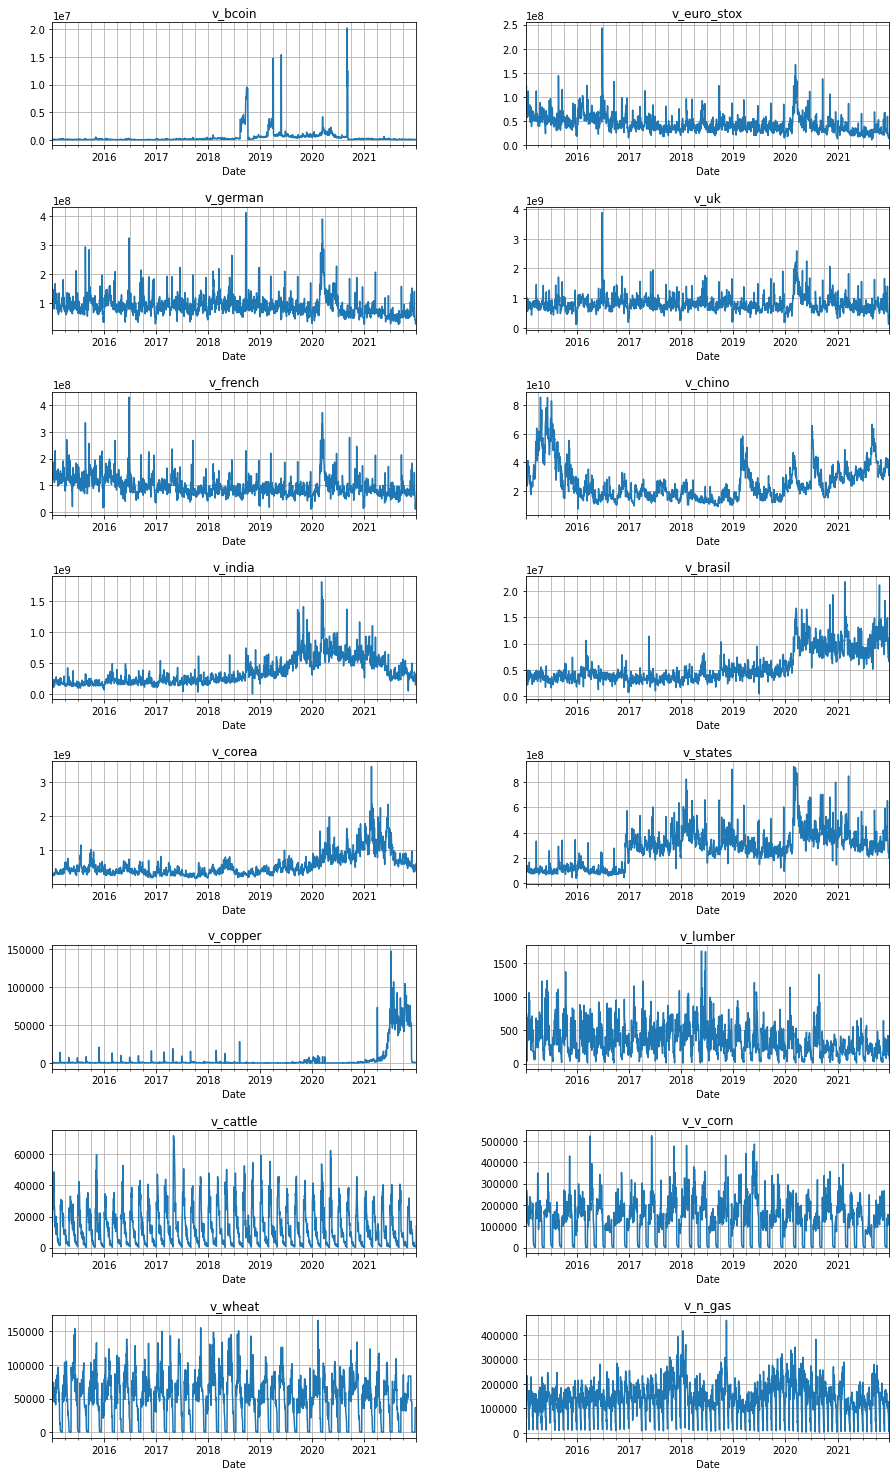

In [143]:
# volume : features
plt.figure(figsize =(15, 60))

for i, feature in enumerate(v_mod):
    plt.subplot(18, 2, i+1)
    df[v_mod[i]].plot()
    plt.title(v_mod[i])
    plt.grid(which='both')
    
plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()
# excluded euro and crude oil 

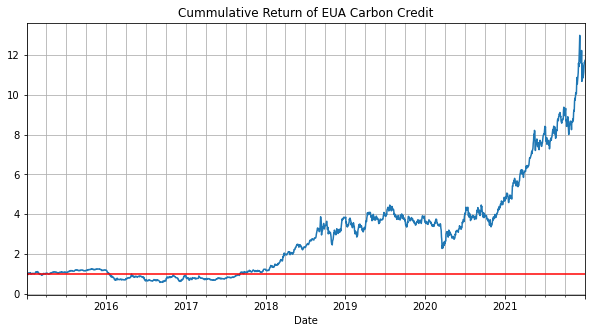

In [149]:
# cumulative change: target
plt.figure(figsize=(10,5))
pri = df['carbon'][0]
rtn = df['carbon']/pri
rtn.plot()
plt.axhline(1, color='red')
plt.title('Cummulative Return of EUA Carbon Credit')

plt.grid(which='both')
plt.show()

In [147]:
len(ftrs_sc)

18

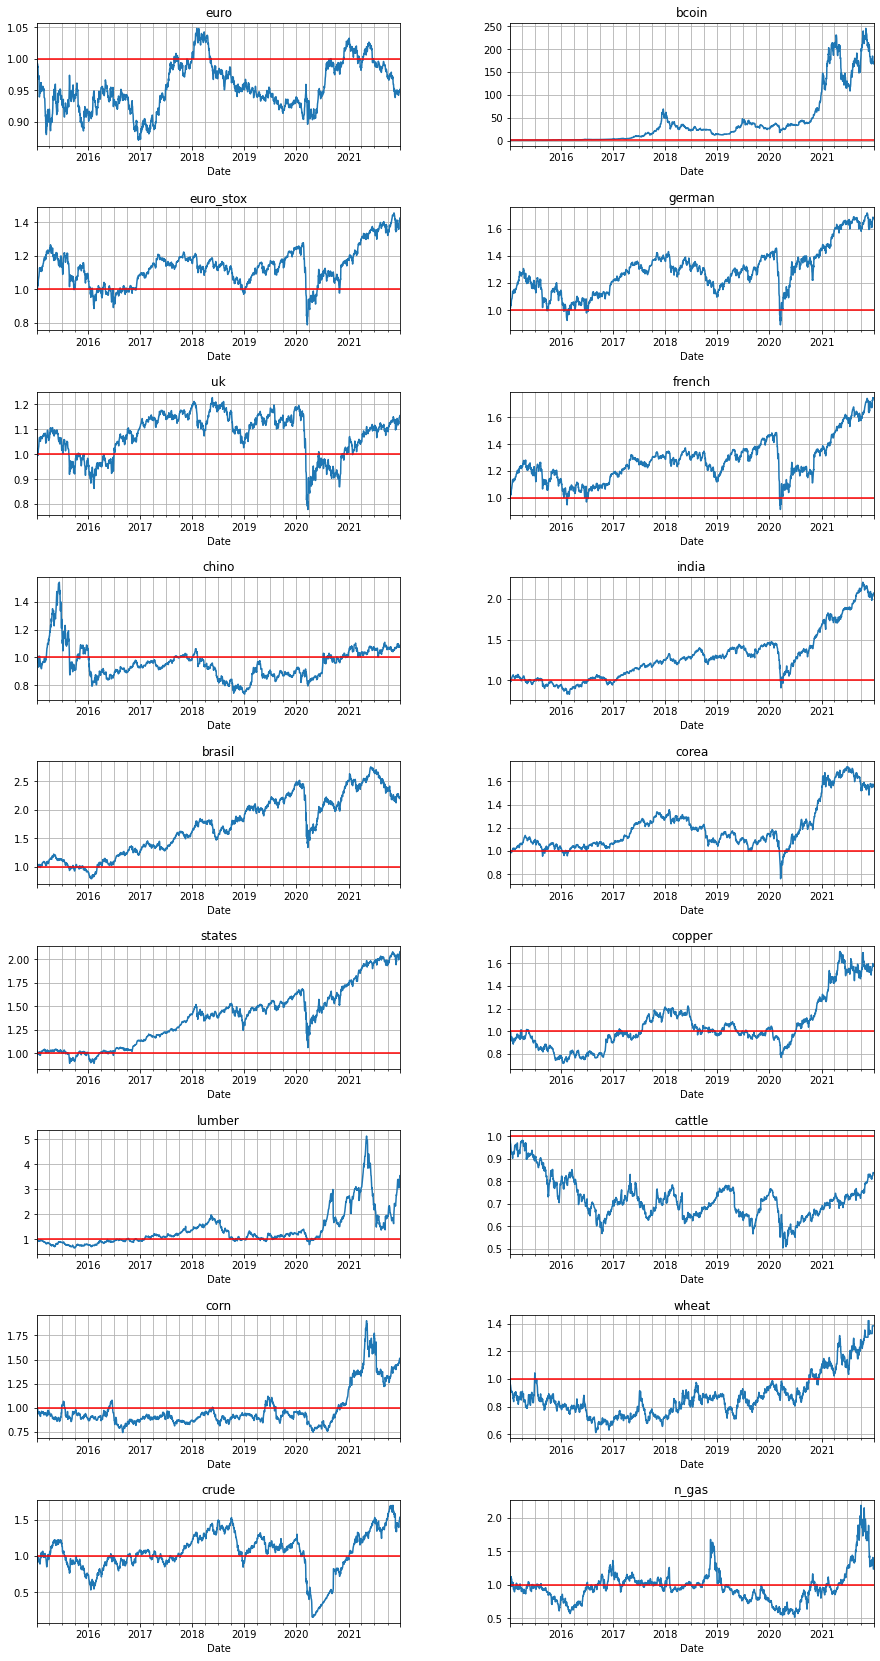

In [150]:
# cumulative change: features


plt.figure(figsize =(15, 60))

for i, feature in enumerate(ftrs_sc):
    plt.subplot(18, 2, i+1)
    pri = df[ftrs_sc[i]][0]
    rtn = df[ftrs_sc[i]]/pri
    rtn.plot()
    plt.axhline(1, color='red')
    plt.title(ftrs_sc[i])
    plt.grid(which='both')
    
plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()

In [ ]:
# correlation in prices

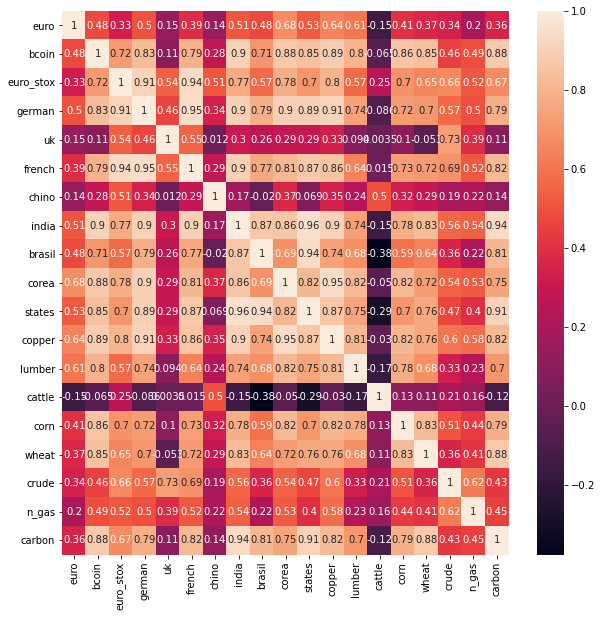

In [152]:
plt.figure(figsize =(10, 10))
sns.heatmap(price.corr(), annot=True)
plt.show()

In [ ]:
# correlation in volume

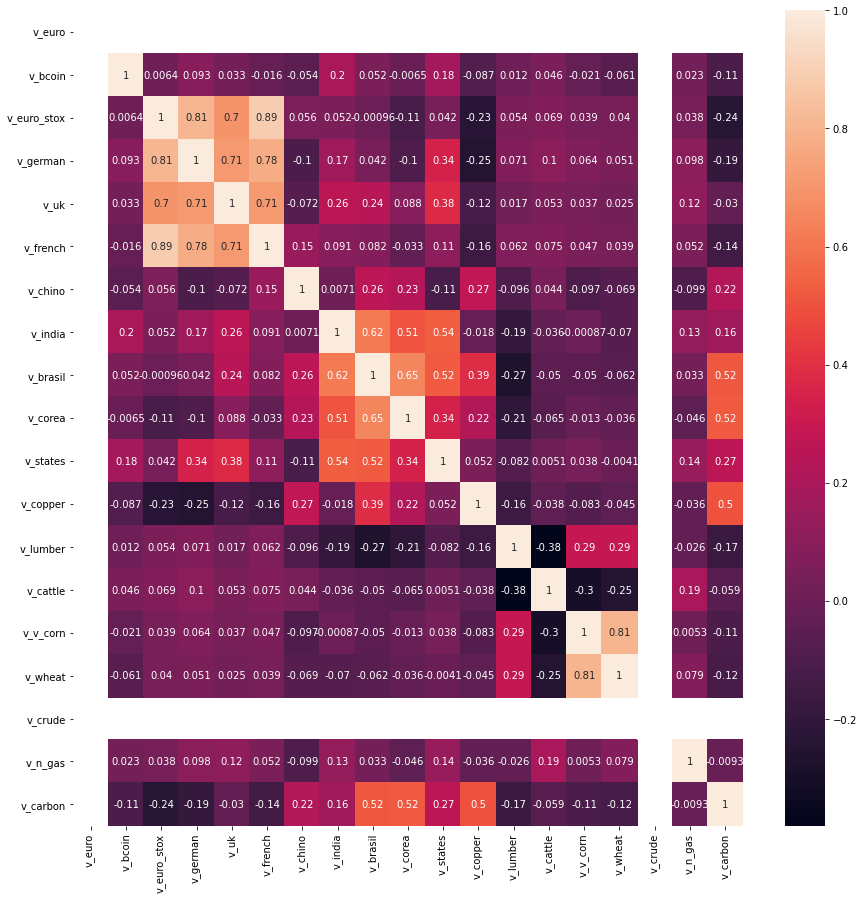

In [156]:
plt.figure(figsize =(15, 15))
sns.heatmap(volume.corr(), annot=True)
plt.show()

In [ ]:
df.to_csv('carbon.csv')

# 2.  machine learning model design

### 2-1. data form = price
### 0. window size =10

In [213]:
window_size =10
x = []
y = []

for i in range(len(df) - window_size):
    x.append([df.iloc[i+j,:] for j in range(window_size)])
    y.append(df.iloc[window_size+i, 18])

In [214]:
X = np.asarray(x)
y = np.asarray(y)
print(X.shape, y.shape)

(1815, 10, 38) (1815,)


In [215]:
tts = int(X.shape[0]*0.8)
tts

1452

In [216]:
x[1452]

[euro           1.179000e+00
 bcoin          1.110590e+04
 euro_stox      3.300160e+03
 german         1.282226e+04
 uk             6.131460e+03
 french         4.958740e+03
 chino          3.294550e+03
 india          1.120285e+04
 brasil         1.056050e+05
 corea          2.263160e+03
 states         2.653957e+04
 copper         2.960500e+00
 lumber         5.850000e+02
 cattle         1.014500e+02
 corn           3.155000e+02
 wheat          5.327500e+02
 crude          2.100000e+01
 n_gas          1.854000e+00
 carbon         2.655000e+01
 v_euro         0.000000e+00
 v_bcoin        5.768300e+05
 v_euro_stox    3.592000e+07
 v_german       7.023000e+07
 v_uk           7.180900e+08
 v_french       7.552000e+07
 v_chino        3.249000e+10
 v_india        6.007300e+08
 v_brasil       9.240000e+06
 v_corea        8.994900e+08
 v_states       3.475800e+08
 v_copper       2.000000e+01
 v_lumber       2.600000e+02
 v_cattle       9.060000e+03
 v_v_corn       1.366600e+05
 v_wheat      

In [187]:
from datetime import datetime, timedelta

In [188]:
datetime(2020,8,11) - datetime(1970, 1, 1)

datetime.timedelta(days=18485)

In [219]:
x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1452, 10, 38) (363, 10, 38) (1452,) (363,)


In [220]:
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

(1452, 380) (363, 380)


In [221]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

In [222]:
mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['lr', 'rid','las','xgb','lgbm','rfr']

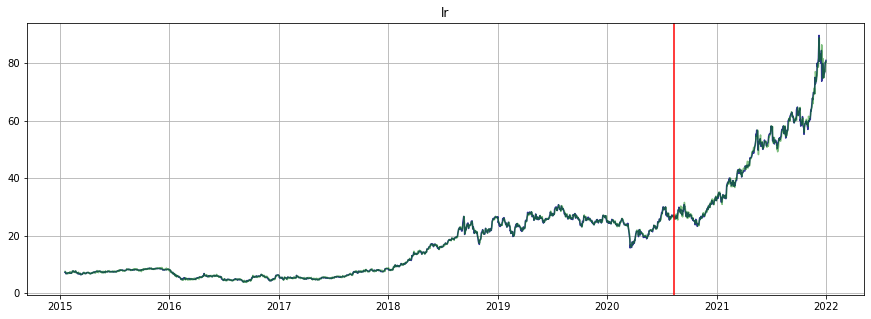

---------------------
model: lr
train_r2score: 0.9981365004608165
test_r2score: 0.9907007119326086
rmse : 1.528935097499107


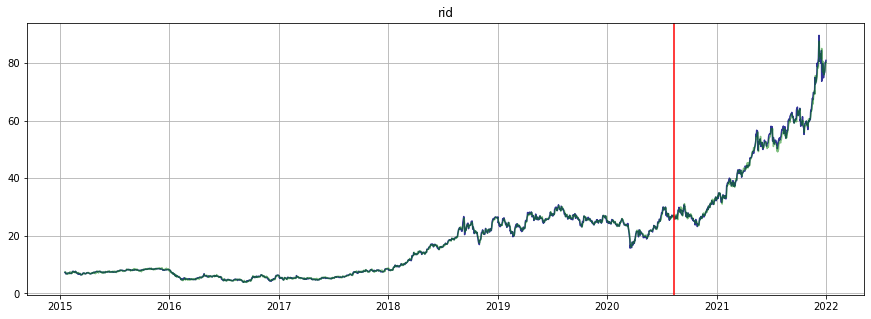

---------------------
model: rid
train_r2score: 0.9980056190121785
test_r2score: 0.9910001218159205
rmse : 1.504120101064415


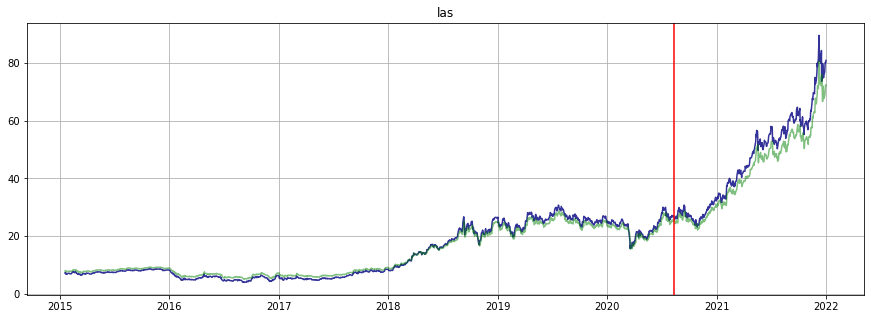

---------------------
model: las
train_r2score: 0.9836324330996801
test_r2score: 0.9157682910674282
rmse : 4.601527327950676


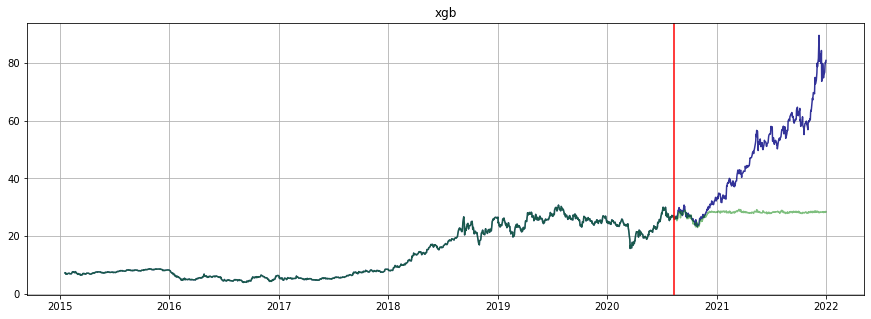

---------------------
model: xgb
train_r2score: 0.9999981350720251
test_r2score: -1.288558345724454
rmse : 23.98530217022992


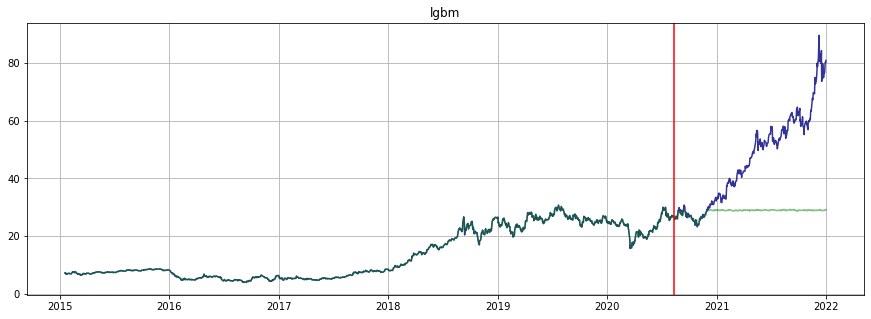

---------------------
model: lgbm
train_r2score: 0.9999137302852682
test_r2score: -1.1912345897741097
rmse : 23.469759378166934


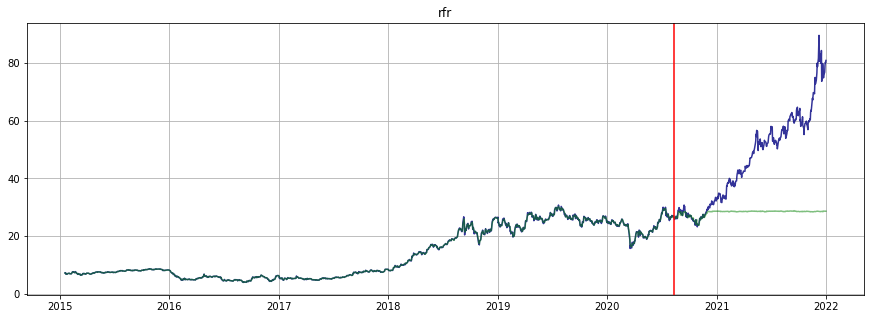

---------------------
model: rfr
train_r2score: 0.9995801669409681
test_r2score: -1.2474128627768168
rmse : 23.768711029630584


In [224]:
for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df.iloc[10:].index

    plt.figure(figsize=(15,5))
    plt.plot(df['carbon'].iloc[10:], color ='navy', alpha =0.8)
    plt.plot(x, color ='green', alpha=0.5)
    plt.grid()
    plt.axvline(18485, color='red')
    plt.title(n_mds[i])
    plt.show()
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', r2_score(y_train, trpreds))
    print('test_r2score:', r2_score(y_test, preds))
    print('rmse :', np.sqrt(mean_squared_error(y_test, preds)))

### 2-0. data form = price
### 1. window size =30

In [226]:
window_size =30
x = []
y = []

for i in range(len(df) - window_size):
    x.append([df.iloc[i+j,:] for j in range(window_size)])
    y.append(df.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1436, 1140) (359, 1140)


In [227]:
tts

1436

In [228]:
x[1436]

[euro           1.127000e+00
 bcoin          9.256000e+03
 euro_stox      3.321560e+03
 german         1.261680e+04
 uk             6.189900e+03
 french         5.043730e+03
 chino          3.345340e+03
 india          1.079965e+04
 brasil         9.776100e+04
 corea          2.164170e+03
 states         2.589018e+04
 copper         2.832500e+00
 lumber         4.710000e+02
 cattle         1.000000e+02
 corn           3.450000e+02
 wheat          4.922500e+02
 crude          1.786000e+01
 n_gas          1.876000e+00
 carbon         2.970000e+01
 v_euro         0.000000e+00
 v_bcoin        4.205500e+05
 v_euro_stox    3.487000e+07
 v_german       7.879000e+07
 v_uk           6.003600e+08
 v_french       7.599000e+07
 v_chino        6.578000e+10
 v_india        6.367700e+08
 v_brasil       8.950000e+06
 v_corea        8.474300e+08
 v_states       3.490000e+08
 v_copper       1.000000e+01
 v_lumber       5.000000e+01
 v_cattle       2.281000e+04
 v_v_corn       1.270000e+03
 v_wheat      

In [229]:
datetime(2020,8,17) - datetime(1970, 1, 1)

datetime.timedelta(days=18491)

In [ ]:
### from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['lr', 'rid','las','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df.iloc[30:].index

    plt.figure(figsize=(15,5))
    plt.plot(df['carbon'].iloc[30:], color ='navy', alpha =0.8)
    plt.plot(x, color ='green', alpha=0.5)
    plt.grid()
    plt.axvline(18491, color='red')
    plt.title(n_mds[i])
    plt.show()
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', r2_score(y_train, trpreds))
    print('test_r2score:', r2_score(y_test, preds))
    print('rmse :', np.sqrt(mean_squared_error(y_test, preds)))

### 2-0. data form = price
### 2. window size =5

In [232]:
window_size =5
x = []
y = []

for i in range(len(df) - window_size):
    x.append([df.iloc[i+j,:] for j in range(window_size)])
    y.append(df.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape, tts)

(1456, 190) (364, 190) 1456


In [233]:
x[tts]

[euro           1.180000e+00
 bcoin          1.118470e+04
 euro_stox      3.254290e+03
 german         1.260087e+04
 uk             6.036000e+03
 french         4.889520e+03
 chino          3.371690e+03
 india          1.109525e+04
 brasil         1.012160e+05
 corea          2.279970e+03
 states         2.682847e+04
 copper         2.956500e+00
 lumber         6.109000e+02
 cattle         1.022800e+02
 corn           3.082500e+02
 wheat          5.082500e+02
 crude          2.188000e+01
 n_gas          2.193000e+00
 carbon         2.717000e+01
 v_euro         0.000000e+00
 v_bcoin        4.857900e+05
 v_euro_stox    4.768000e+07
 v_german       6.561000e+07
 v_uk           7.666700e+08
 v_french       8.695000e+07
 v_chino        4.423000e+10
 v_india        6.257400e+08
 v_brasil       1.203000e+07
 v_corea        7.229100e+08
 v_states       3.554600e+08
 v_copper       4.000000e+01
 v_lumber       3.700000e+02
 v_cattle       7.600000e+03
 v_v_corn       1.618300e+05
 v_wheat      

In [235]:
datetime(2020,8,10) - datetime(1970, 1, 1)

datetime.timedelta(days=18484)

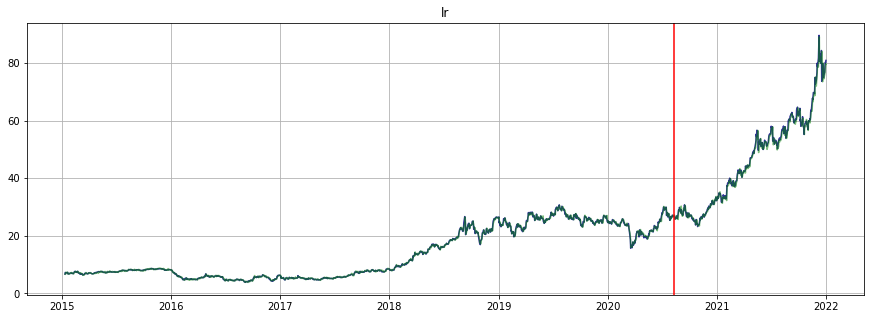

---------------------
model: lr
train_r2score: 0.9976791669757487
test_r2score: 0.9910690178240067
rmse : 1.4994895969269144


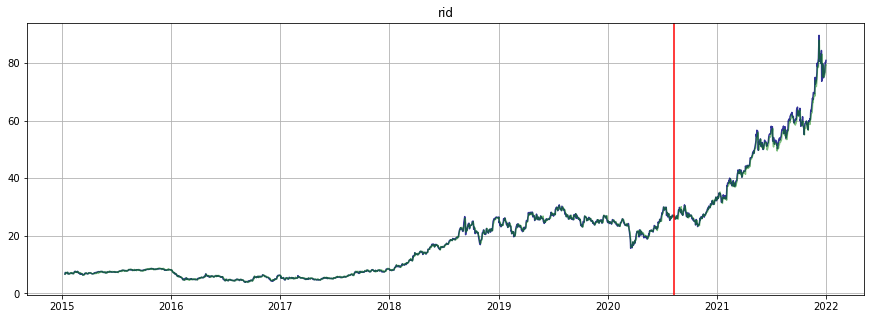

---------------------
model: rid
train_r2score: 0.9975717435670333
test_r2score: 0.9904804864442612
rmse : 1.548107890148283


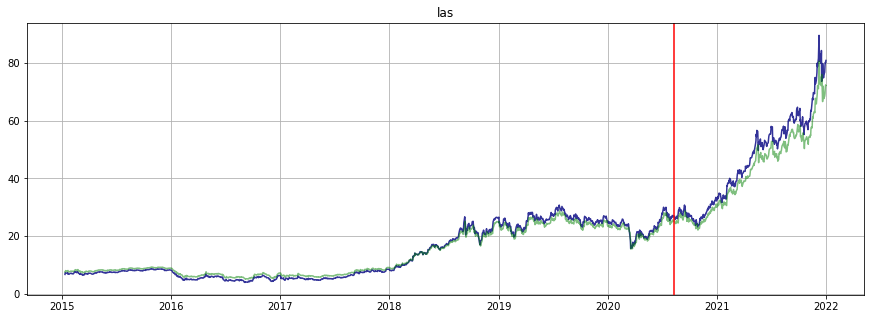

---------------------
model: las
train_r2score: 0.9836015122480576
test_r2score: 0.9158950336618287
rmse : 4.601555520738585


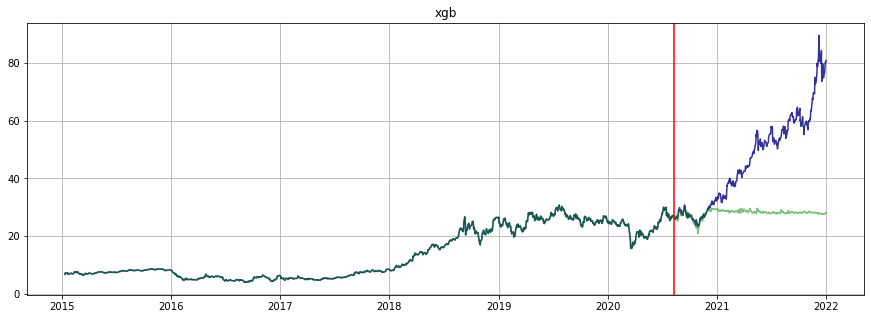

---------------------
model: xgb
train_r2score: 0.9999974620512074
test_r2score: -1.292459592215542
rmse : 24.02396521997067


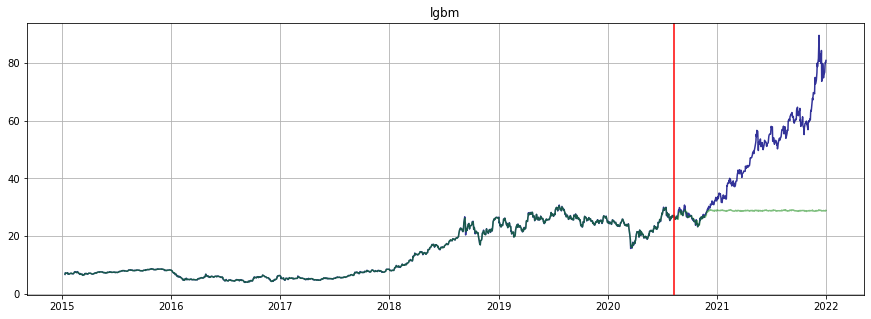

---------------------
model: lgbm
train_r2score: 0.9998928793169124
test_r2score: -1.2016865447512095
rmse : 23.543530573353074


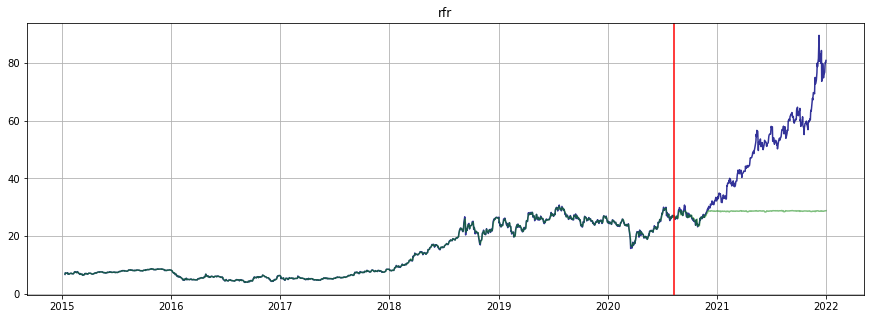

---------------------
model: rfr
train_r2score: 0.9995634346290405
test_r2score: -1.2221433566461997
rmse : 23.652654189856683


In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['lr', 'rid','las','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df.iloc[5:].index

    plt.figure(figsize=(15,5))
    plt.plot(df['carbon'].iloc[5:], color ='navy', alpha =0.8)
    plt.plot(x, color ='green', alpha=0.5)
    plt.grid()
    plt.axvline(18484, color='red')
    plt.title(n_mds[i])
    plt.show()
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', r2_score(y_train, trpreds))
    print('test_r2score:', r2_score(y_test, preds))
    print('rmse :', np.sqrt(mean_squared_error(y_test, preds)))

### 2-1. data form = pct_change
### 0. 분포 확인

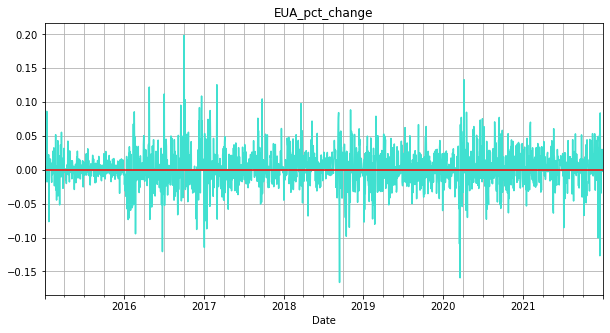

In [261]:
plt.figure(figsize=(10,5))
df['carbon'].pct_change().plot(color = 'turquoise')
plt.title('EUA_pct_change')
plt.grid(which='both')
plt.axhline(0, color='red')

plt.show()

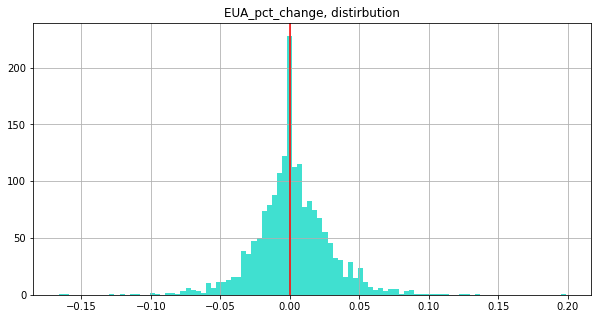

In [260]:
plt.figure(figsize=(10,5))
plt.hist(df['carbon'].pct_change(), bins=100, color = 'turquoise')
plt.title('EUA_pct_change, distirbution')
plt.grid(which='both')
plt.axvline(0, color='red')

plt.show()

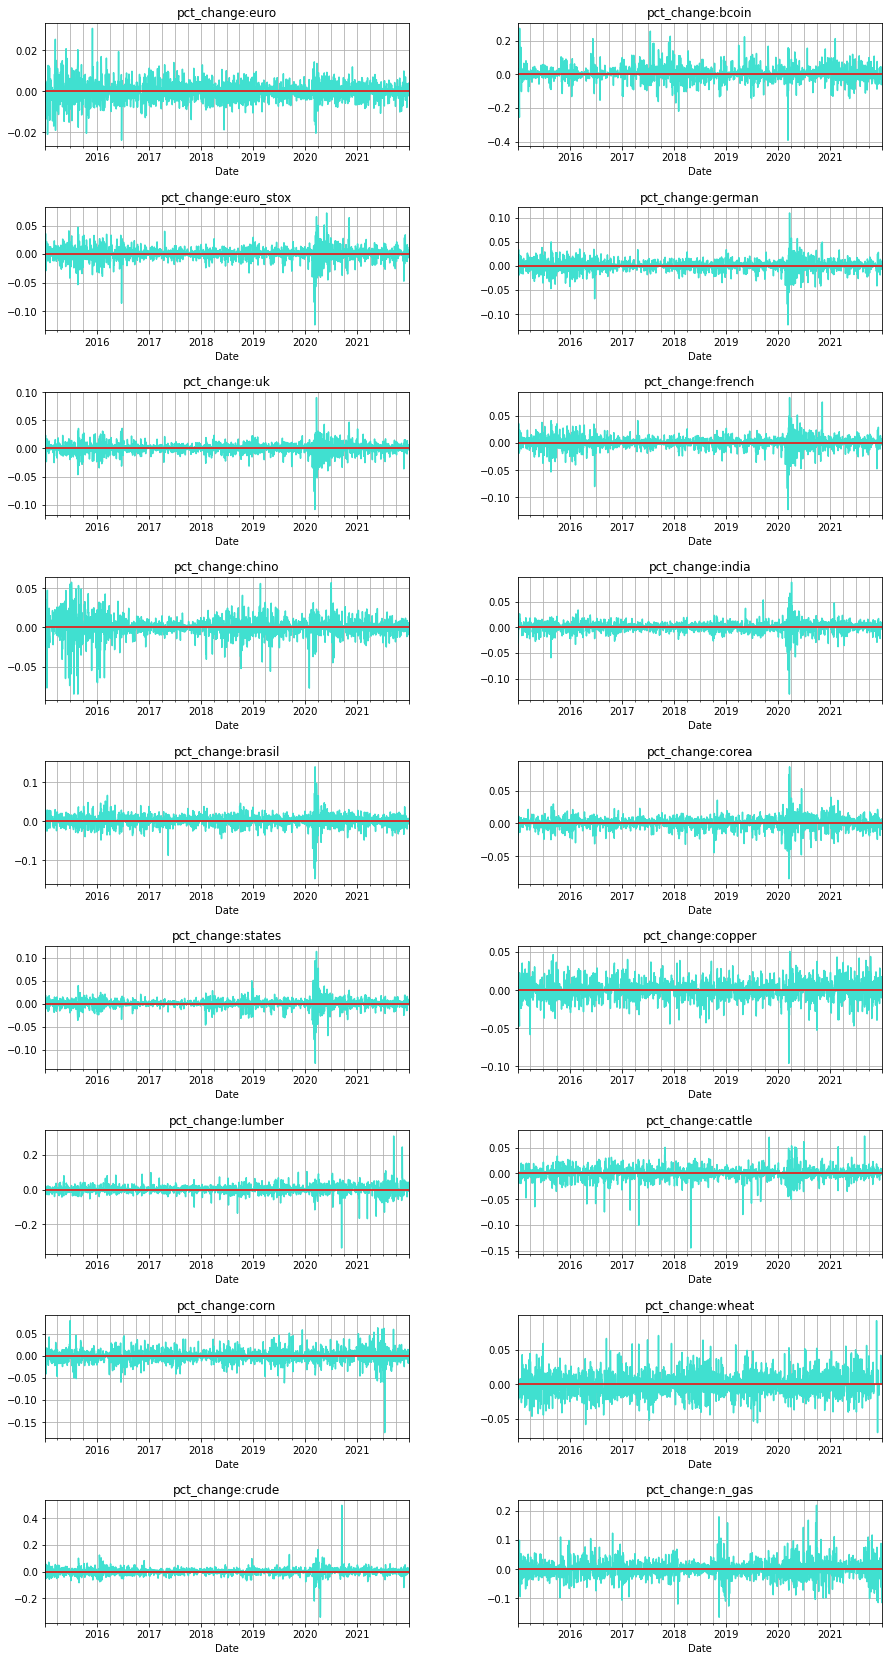

In [262]:
plt.figure(figsize =(15, 60))

for i in range(len(ftrs_sc)):
    plt.subplot(18, 2, i+1)
    price.iloc[:, i].pct_change().plot(color = 'turquoise')
    plt.title('pct_change:{}'.format(price.columns[i]))
    plt.grid(which='both')
    plt.axhline(0, color='red')

plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()

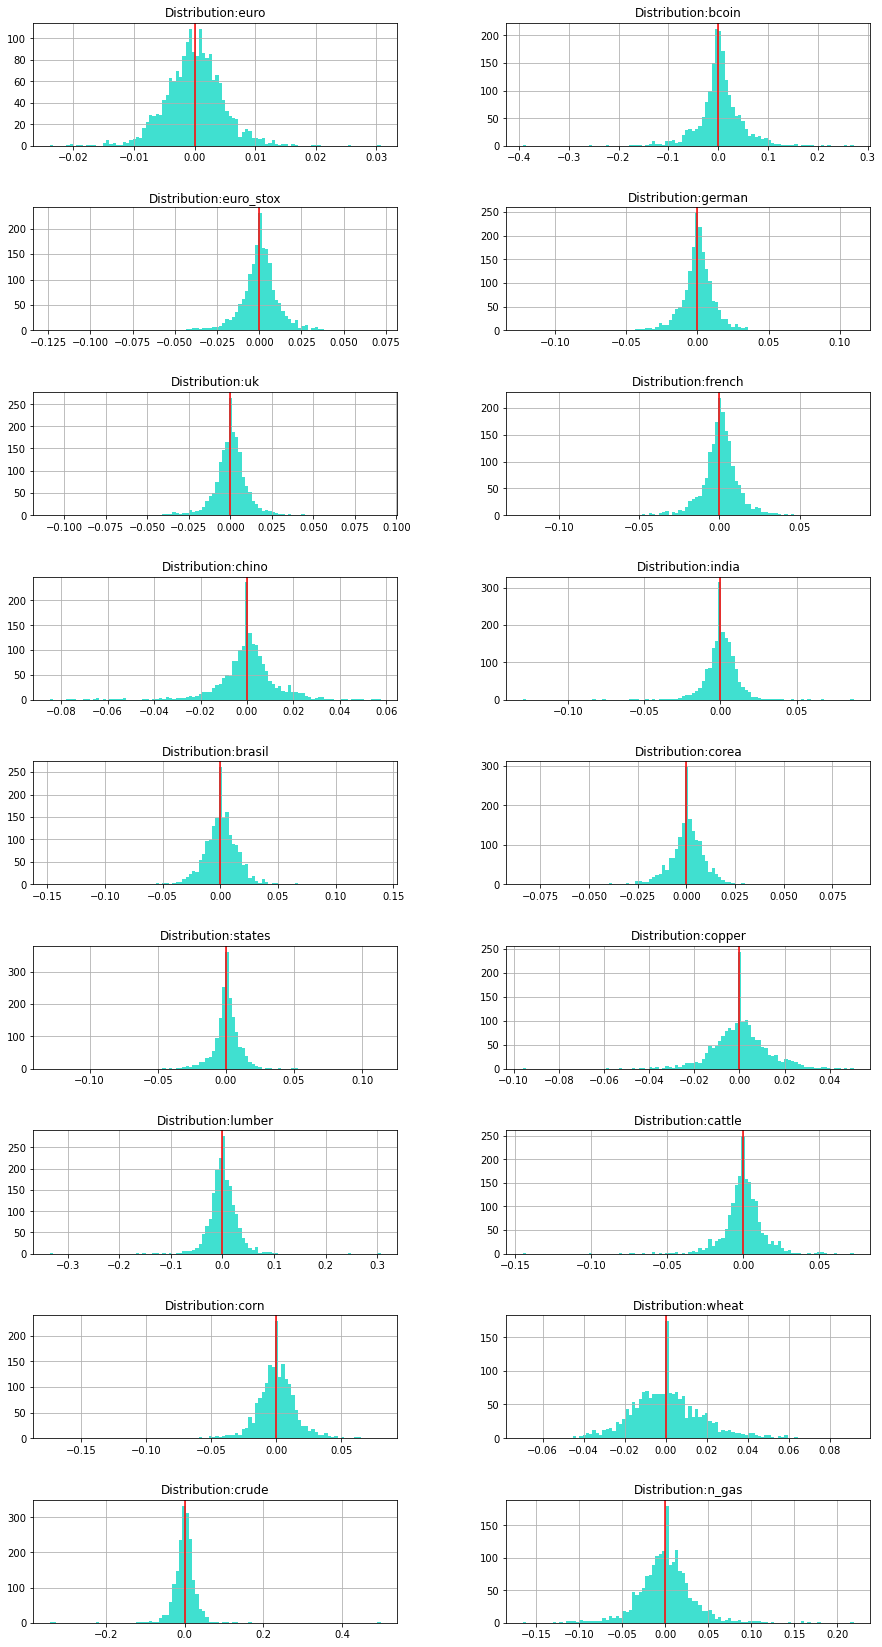

In [259]:
plt.figure(figsize =(15, 60))

for i in range(len(ftrs_sc)):
    plt.subplot(18, 2, i+1)
    plt.hist(price.iloc[:, i].pct_change(), bins=100, color = 'turquoise')
    plt.title('Distribution:{}'.format(price.columns[i]))
    plt.grid(which='both')
    plt.axvline(0, color='red')

    
plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()

### 2-1. data form = pct_change
### 1. window_size =10

In [271]:
df_change = df.pct_change()[1:].fillna(0)

In [273]:
df_change.shape

(1824, 38)

In [274]:
window_size =10
x = []
y = []

for i in range(len(df_change) - window_size):
    x.append([df_change.iloc[i+j,:] for j in range(window_size)])
    y.append(df_change.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1451, 380) (363, 380)


In [275]:
x[tts]

[euro           0.006488
 bcoin          0.018096
 euro_stox     -0.001029
 german        -0.001014
 uk             0.000359
 french         0.006046
 chino          0.020629
 india         -0.008646
 brasil         0.014370
 corea          0.002734
 states         0.006076
 copper         0.000507
 lumber         0.031928
 cattle         0.005451
 corn          -0.014062
 wheat          0.017670
 crude          0.011074
 n_gas          0.030000
 carbon         0.016852
 v_euro         0.000000
 v_bcoin       -0.123851
 v_euro_stox    0.145408
 v_german       0.208154
 v_uk           0.172258
 v_french      -0.040041
 v_chino        0.122668
 v_india       -0.121599
 v_brasil       0.016502
 v_corea        0.037809
 v_states      -0.040894
 v_copper       0.000000
 v_lumber      -0.257143
 v_cattle      -0.183048
 v_v_corn       0.234062
 v_wheat       -0.177410
 v_crude        0.000000
 v_n_gas       -0.875192
 v_carbon       0.529801
 Name: 2020-07-29 00:00:00, dtype: float64,
 euro 

In [276]:
datetime(2020,8,11) - datetime(1970, 1, 1)

datetime.timedelta(days=18485)

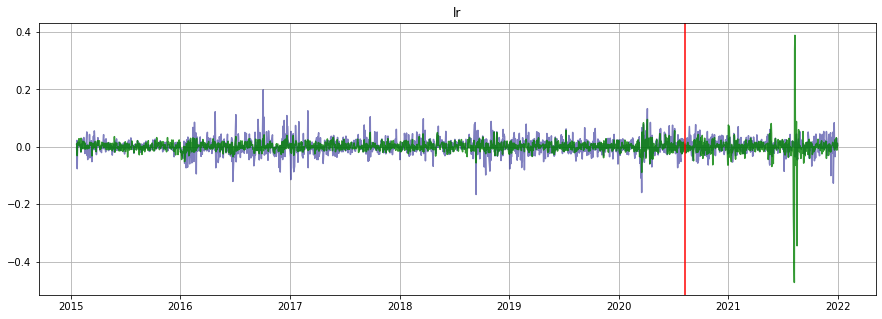

---------------------
model: lr
train_r2score: 0.2653475006730187
test_r2score: -3.2925490339298396
rmse : 0.05493123097457207


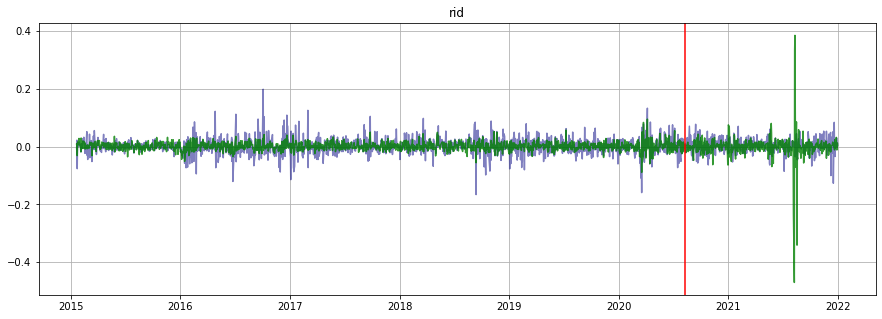

---------------------
model: rid
train_r2score: 0.26535267566443976
test_r2score: -3.2296531096748975
rmse : 0.054527310148461676


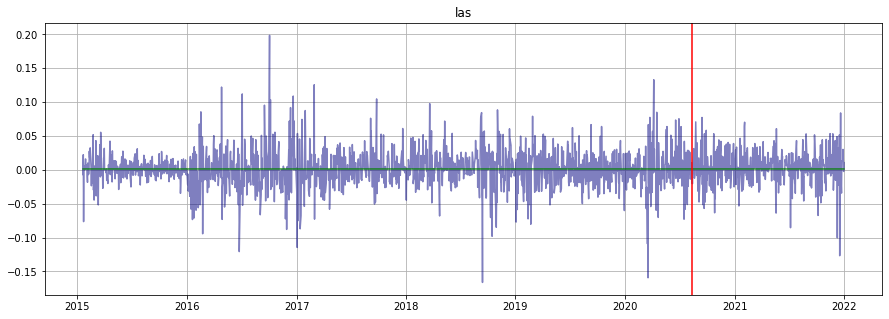

---------------------
model: las
train_r2score: 0.0
test_r2score: -0.0064618680911439075
rmse : 0.02659869696743059


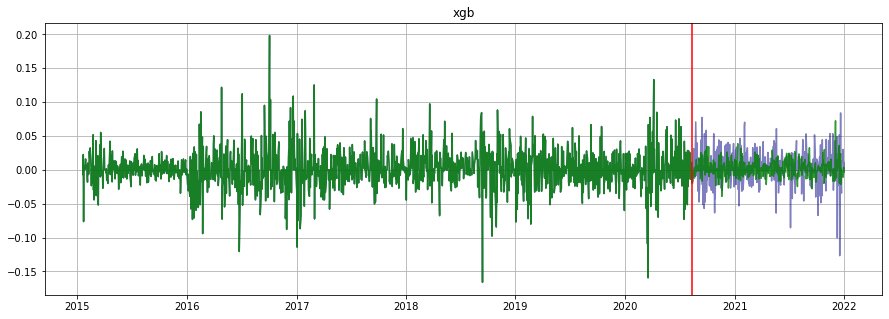

---------------------
model: xgb
train_r2score: 0.9998022738119624
test_r2score: -0.25950748170459015
rmse : 0.029755145262647376


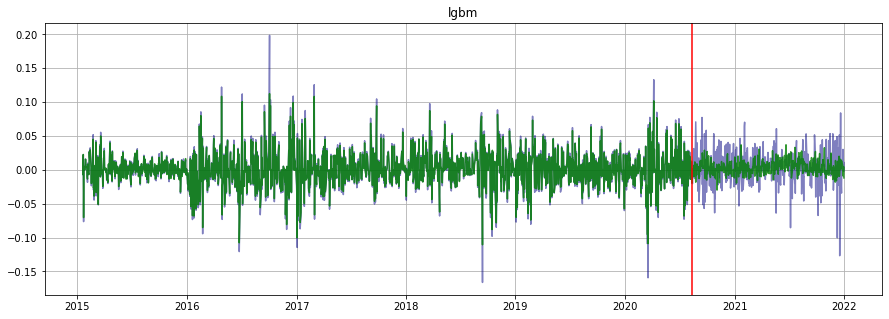

---------------------
model: lgbm
train_r2score: 0.9778954483777337
test_r2score: -0.25576795464474533
rmse : 0.029710940330676946


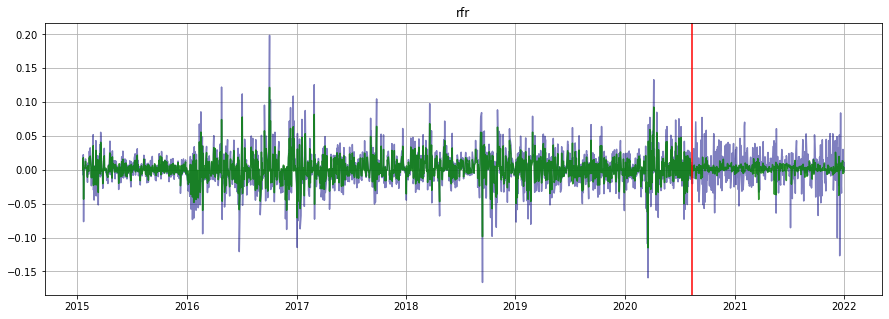

---------------------
model: rfr
train_r2score: 0.8536814595328701
test_r2score: -0.07336583208491465
rmse : 0.02746854036030175


In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['lr', 'rid','las','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df_change.iloc[10:].index

    plt.figure(figsize=(15,5))
    plt.plot(df_change['carbon'].iloc[10:], color ='navy', alpha =0.5)
    plt.plot(x, color ='green', alpha=0.8)
    plt.grid()
    plt.axvline(18485, color='red')
    plt.title(n_mds[i])
    plt.show()
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', r2_score(y_train, trpreds))
    print('test_r2score:', r2_score(y_test, preds))
    print('rmse :', np.sqrt(mean_squared_error(y_test, preds)))

### 2-1. data form = pct_change
### 2. window size =30

In [288]:
window_size =30
x = []
y = []

for i in range(len(df_change) - window_size):
    x.append([df_change.iloc[i+j,:] for j in range(window_size)])
    y.append(df_change.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1435, 1140) (359, 1140)


In [289]:
x[tts]

[euro          -0.003360
 bcoin         -0.008887
 euro_stox     -0.008498
 german        -0.009161
 uk            -0.015279
 french        -0.007435
 chino          0.003739
 india          0.003345
 brasil        -0.011886
 corea         -0.010860
 states        -0.015097
 copper         0.009264
 lumber         0.023691
 cattle        -0.000999
 corn          -0.004329
 wheat          0.005618
 crude         -0.001677
 n_gas          0.025137
 carbon        -0.010330
 v_euro         0.000000
 v_bcoin       -0.175828
 v_euro_stox   -0.190388
 v_german       0.007674
 v_uk          -0.138243
 v_french      -0.141550
 v_chino        0.021587
 v_india        0.114774
 v_brasil      -0.056902
 v_corea        0.270700
 v_states       0.019693
 v_copper      -0.900000
 v_lumber       0.000000
 v_cattle      -0.143447
 v_v_corn      -0.392344
 v_wheat        0.250000
 v_crude        0.000000
 v_n_gas       -0.183294
 v_carbon       0.633423
 Name: 2020-07-07 00:00:00, dtype: float64,
 euro 

In [290]:
datetime(2020,8,17) - datetime(1970, 1, 1)

datetime.timedelta(days=18491)

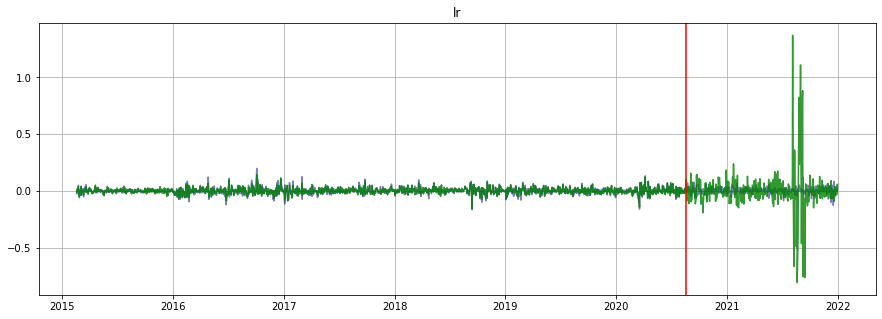

---------------------
model: lr
train_r2score: 0.7872280521011547
test_r2score: -43.76659151068154
rmse : 0.1778597628641358


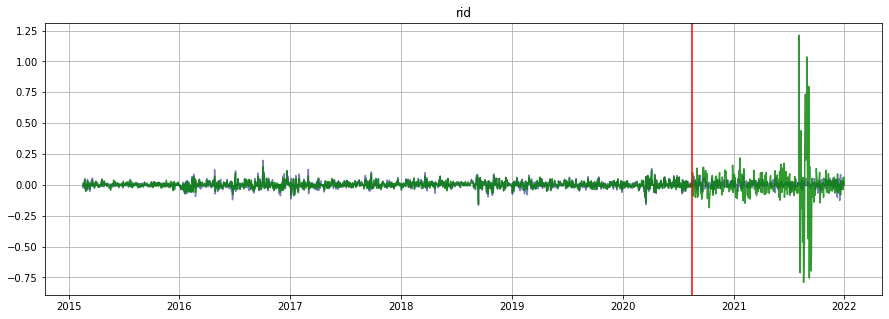

---------------------
model: rid
train_r2score: 0.7921450549025996
test_r2score: -39.871494055709334
rmse : 0.1699460016581593


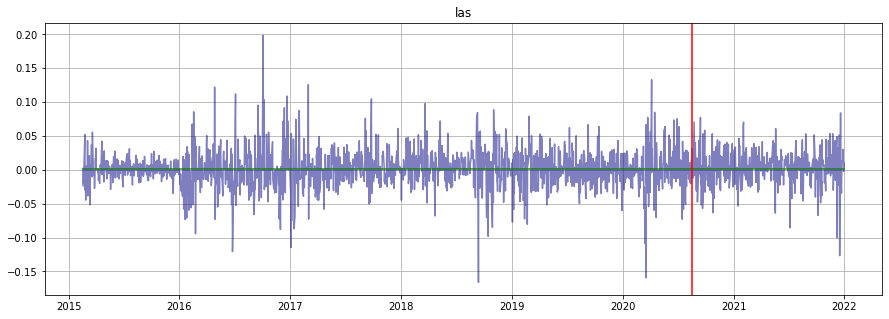

---------------------
model: las
train_r2score: 0.0
test_r2score: -0.006744022765938107
rmse : 0.026672285084276874


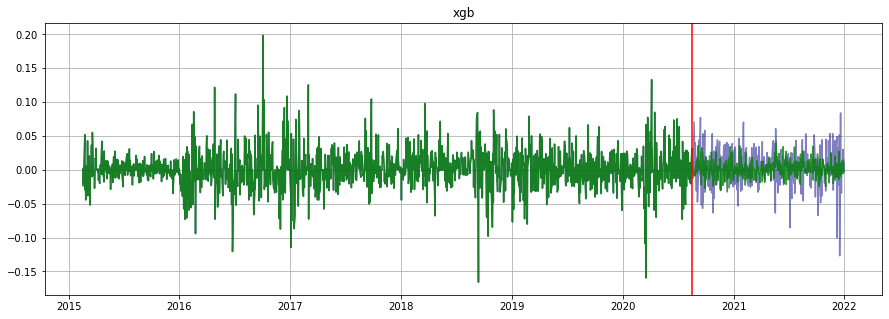

---------------------
model: xgb
train_r2score: 0.999865631486081
test_r2score: -0.2321506843707153
rmse : 0.02950751291111191


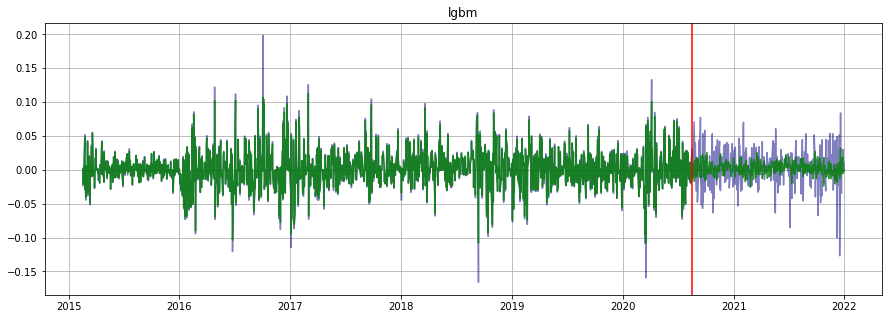

---------------------
model: lgbm
train_r2score: 0.9805791657256302
test_r2score: -0.13506448879645738
rmse : 0.028321155130733293


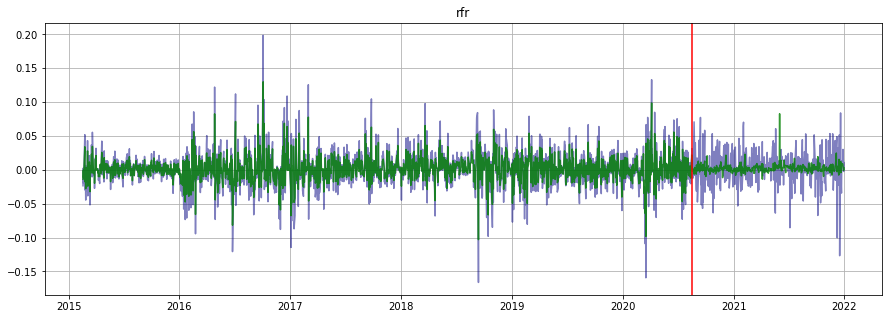

---------------------
model: rfr
train_r2score: 0.8592204930871749
test_r2score: -0.0713509874648337
rmse : 0.027514814020093117


In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['lr', 'rid','las','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df_change.iloc[30:].index

    plt.figure(figsize=(15,5))
    plt.plot(df_change['carbon'].iloc[30:], color ='navy', alpha =0.5)
    plt.plot(x, color ='green', alpha=0.8)
    plt.grid()
    plt.axvline(18491, color='red')
    plt.title(n_mds[i])
    plt.show()
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', r2_score(y_train, trpreds))
    print('test_r2score:', r2_score(y_test, preds))
    print('rmse :', np.sqrt(mean_squared_error(y_test, preds)))

In [ ]:
# rfr 엄청 오래 걸림

### 2-1. data form = pct_change
### 3. window size = 5

In [292]:
window_size =5
x = []
y = []

for i in range(len(df_change) - window_size):
    x.append([df_change.iloc[i+j,:] for j in range(window_size)])
    y.append(df_change.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1455, 190) (364, 190)


In [293]:
x[tts]

[euro           0.003316
 bcoin         -0.003537
 euro_stox      0.001850
 german        -0.003646
 uk             0.000522
 french         0.002787
 chino          0.001105
 india          0.018698
 brasil        -0.015696
 corea          0.012852
 states         0.006153
 copper        -0.003707
 lumber         0.024656
 cattle        -0.007279
 corn          -0.029134
 wheat         -0.024472
 crude          0.021952
 n_gas          0.043789
 carbon         0.026057
 v_euro         0.000000
 v_bcoin        0.033068
 v_euro_stox   -0.023951
 v_german      -0.104545
 v_uk          -0.191737
 v_french      -0.168897
 v_chino        0.085399
 v_india       -0.081051
 v_brasil       0.103670
 v_corea        0.114810
 v_states      -0.190996
 v_copper      -0.900000
 v_lumber       0.321429
 v_cattle      -0.248269
 v_v_corn       0.945306
 v_wheat        0.152457
 v_crude        0.000000
 v_n_gas       -0.395528
 v_carbon       1.535354
 Name: 2020-08-04 00:00:00, dtype: float64,
 euro 

In [286]:
datetime(2020,8,10) - datetime(1970, 1, 1)

datetime.timedelta(days=18484)

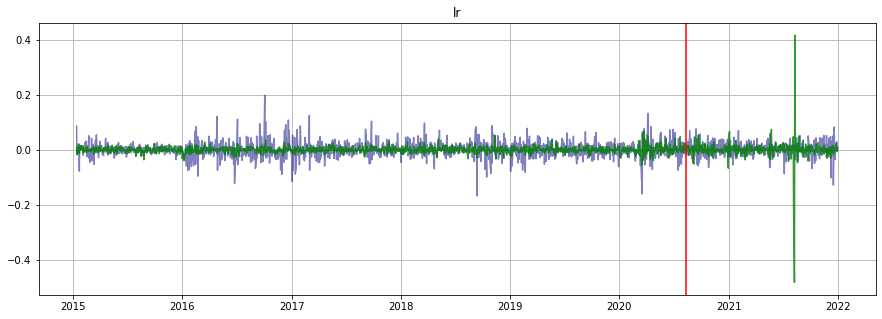

---------------------
model: lr
train_r2score: 0.1518137720418118
test_r2score: -2.3560915110787013
rmse : 0.048553025209233235


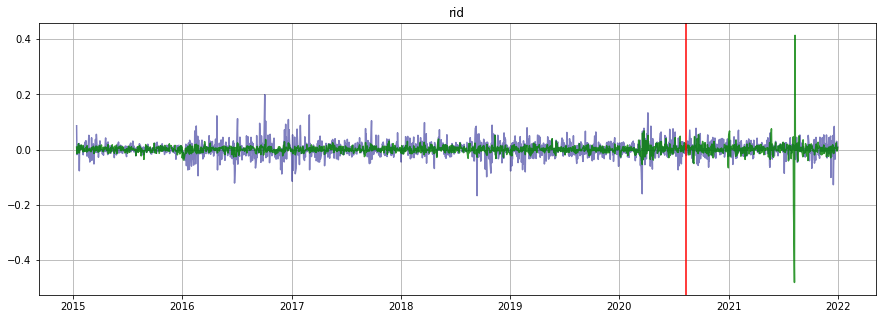

---------------------
model: rid
train_r2score: 0.15180994499273104
test_r2score: -2.3409289834943214
rmse : 0.048443221890119875


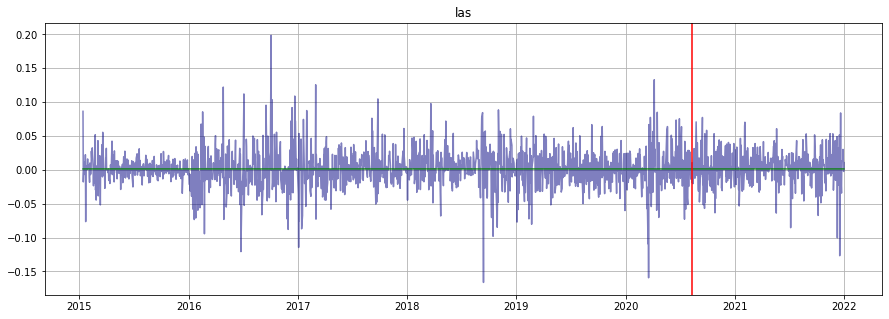

---------------------
model: las
train_r2score: 0.0
test_r2score: -0.005736878719940108
rmse : 0.02657918042903381


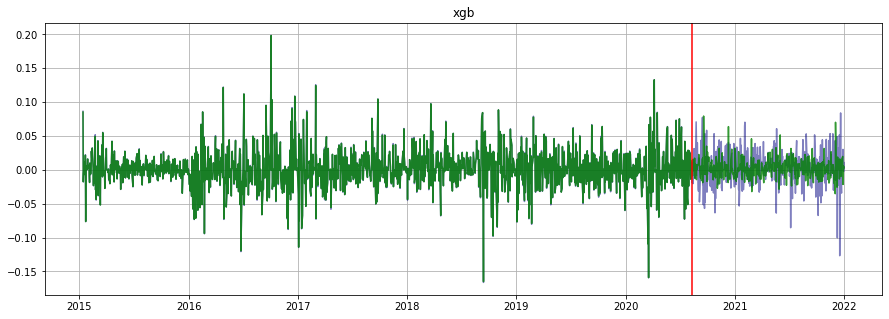

---------------------
model: xgb
train_r2score: 0.9996179000782667
test_r2score: -0.3558966834609951
rmse : 0.030861192028850678


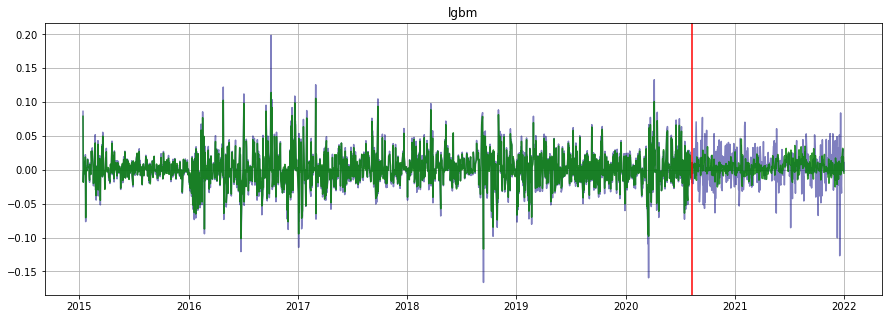

---------------------
model: lgbm
train_r2score: 0.9701705584239005
test_r2score: -0.23964119121934058
rmse : 0.029508517894381348


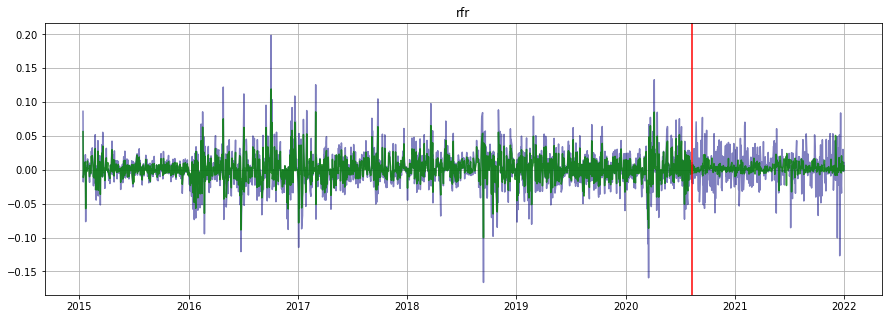

---------------------
model: rfr
train_r2score: 0.8568223720720514
test_r2score: -0.1040728182966173
rmse : 0.027848272287100868


In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['lr', 'rid','las','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df_change.iloc[5:].index

    plt.figure(figsize=(15,5))
    plt.plot(df_change['carbon'].iloc[5:], color ='navy', alpha =0.5)
    plt.plot(x, color ='green', alpha=0.8)
    plt.grid()
    plt.axvline(18484, color='red')
    plt.title(n_mds[i])
    plt.show()
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', r2_score(y_train, trpreds))
    print('test_r2score:', r2_score(y_test, preds))
    print('rmse :', np.sqrt(mean_squared_error(y_test, preds)))

### 2-1-3-1 grid search 
### data form = pct_change 3. window size = 5

In [ ]:
# xgb grid

In [295]:
from random import randint
params= {
    'n_estimators':[200, 300,400],
    'max_depth':[10, 15,20,25],
    'min_samples_split':[0.05, 0.01, 0.005],
}

In [296]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(xgb, params, n_jobs=-1)
gs.fit(x_train_scaled, y_train)

[17:27:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
 

In [ ]:
1721
1729

In [297]:
gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, min_samples_split=0.05, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [299]:
ddaq =gs.best_estimator_
print('train정확도', ddaq.score(x_train_scaled, y_train))
print('test정확도', ddaq.score(x_test_scaled, y_test))

train정확도 0.9998190227812636
test정확도 -0.47446222799467197


In [301]:
# rfr grid
from random import randint
params= {
    'n_estimators':[200, 300,400],
    'max_depth':[10, 15,20,25],
    'min_samples_split':[0.05, 0.01, 0.005],
}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(rfr, params, n_jobs=-1)
gs.fit(x_train_scaled, y_train)

gs.best_estimator_

ddaq =gs.best_estimator_
print('train정확도', ddaq.score(x_train_scaled, y_train))
print('test정확도', ddaq.score(x_test_scaled, y_test))

train정확도 0.2455160172622428
test정확도 -0.11107231188906641


In [302]:
gs.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_split=0.05, n_estimators=200)

In [303]:
gs.best_score_

-0.011490840834022142

In [304]:
df.to_csv('carbon.csv')